<a href="https://colab.research.google.com/github/michelFB/SNCT-Analise-de-Sentimentos-Colab/blob/main/AN%C3%81LISE_DE_SENTIMENTOS_SNCT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minerando Textos - SNCT EUCLIDES DA CUNHA
Facilitador: Michel Ferreira




## Análise de sentimentos usando **Machine Learning**

![alt text](http://www.ecomp.poli.br/amam/wp-content/uploads/2018/09/3_ROBO-MOVEL_300x200.png)


Conectar o Google Drive a Sessão para acessar os arquivos da nuvem.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# importando biblioteca Pandas
# import pandas as pd
# Obtendo o conjunto de dados do arquivo na sessão
# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SNCT2020EUC/Tweets_Mg.csv')

# SELEÇÃO DOS DADOS

In [ ]:
# Obtendo o conjunto de dados do arquivo através da conexão com o GDrive
# Base de dados pública sedida pelo governo do Estado de Minas Gerais.

import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SNCT2020EUC/Tweets_Mg.csv')

### Trabalhando com Dataframes Pandas

In [ ]:
df

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,8194,Thu Feb 09 11:48:07 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,NaN,Ana Lúcia,lapiseirapentel,0,Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8195,8195,Thu Feb 09 12:10:19 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Belo Horizonte - Minas Gerais,Marcelo Rezende,Televans,0,Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8196,8196,Thu Feb 09 12:04:17 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Guarulhos - SP,Leonardo Nascimento,leonardogru,0,Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8197,8197,Thu Feb 09 12:10:04 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Brasil Natal/RN,Lucas Medeiros �©™,parabolicalucas,0,Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Exibe as colunas ou atributos do conjunto de dados
df.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [ ]:
dfTweet = pd.DataFrame(df, columns=['Text','Username','Classificacao'])

In [ ]:
dfTweet.head(10)

,Text,Username,Classificacao
0,���⛪ @ Catedral de Santo Antônio - Governador ...,Leonardo C Schneider,Neutro
1,"� @ Governador Valadares, Minas Gerais https:/...",Wândell,Neutro
2,"�� @ Governador Valadares, Minas Gerais https:...",Wândell,Neutro
3,��� https://t.co/BnDsO34qK0,Ana estudando,Neutro
4,��� PSOL vai questionar aumento de vereadores ...,Emily,Negativo
5,""" bom é bandido morto""\nDeputado Cabo Júlio é ...",Maristela Guimarães,Neutro
6,"""..E 25% dos mineiros dizem não torcer para ti...",Adriano,Neutro
7,"""A gigantesca barba do mal"" em destaque no cad...",Editora Nemo,Neutro
8,"""BB e governo de Minas travam disputa sobre de...",Minas Previ,Negativo
9,"""com vcs bh fica pequena!"" Belo Horizonte (pro...",Marina.,Neutro


In [ ]:
#Conta a quantidade de linhas twites netros, ositivos e negativos
dfTweet.Classificacao.value_counts()

Positivo    3300
Neutro      2453
Negativo    2446
Name: Classificacao, dtype: int64

In [ ]:
classesPadrao = ['Positivo','Negativo','Neutro']

# PRÉ PROCESSAMENTO

### Normalização dos dados

*   Transformar letras para minúsculas 
*   Remoção de caracteres especiais
*   Remoção de Links
*   Substituição de Gírias

In [ ]:
dfTweet.drop_duplicates(['Text'], inplace=True)
dfTweet.reset_index(drop=True, inplace=True)

In [ ]:
dfTweet.Classificacao.value_counts()

Positivo    2840
Neutro      1974
Negativo     951
Name: Classificacao, dtype: int64

In [ ]:
import re
def Normalizacao(instancia):
    instancia = instancia.lower()                                   # Palavras em letra minuscula
    instancia = re.sub(r"http\S+", "", instancia).lower().replace(',','').replace('.','').replace(';','').replace('-','').replace('@','').replace('#','').replace('%','')
    instancia = re.sub(r"http\S+", "", instancia)                   # Remoção de links
    instancia = re.sub('[-10-9]', '', instancia)                    # Remoção de numeros
    instancia = re.sub(r'[-./?!,"#:;()\']','',instancia)             # Remoção de caracteres especiais
    instancia = re.sub("\d+\w*","", instancia)                      # Removendo Letras com numeros
    instancia = instancia.rstrip().lstrip()                         # remove excesso de espaços
    
    
    #  Substituindo abreviaturas do mundo digital em português
    Girias = [' agr ', ' lgl ', ' nss ',' vc ',' vcs ',' tbm ',' n ',' ñ ',' pfv ',' oq ',' mta ', ' qndo ', 'qnt']
    Girias_subs = [' agora ',' legal ',' nossa ', ' você ',' vocês ',' também ',' não ',' não ',' por favor ',' o que ',' muita ',
                          ' quando ', 'quanto']
    for i in range (len(Girias)):
        instancia = instancia.replace(Girias[i],Girias_subs[i])
    
    return (instancia)

In [ ]:
for i in range (len(dfTweet)):
    dfTweet.loc[i, 'Text'] = Normalizacao(dfTweet.loc[i, 'Text'])
dfTweet.head(50)

,Text,Username,Classificacao
0,���⛪ catedral de santo antônio governador va...,Leonardo C Schneider,Neutro
1,� governador valadares minas gerais,Wândell,Neutro
2,�� governador valadares minas gerais,Wândell,Neutro
3,���,Ana estudando,Neutro
4,��� psol vai questionar aumento de vereadores ...,Emily,Negativo
5,bom é bandido morto\ndeputado cabo júlio é con...,Maristela Guimarães,Neutro
6,e dos mineiros dizem não torcer para time nen...,Adriano,Neutro
7,a gigantesca barba do mal em destaque no cader...,Editora Nemo,Neutro
8,bb e governo de minas travam disputa sobre dep...,Minas Previ,Negativo
9,com vocês bh fica pequena belo horizonte pron ...,Marina.,Neutro


### Remoção de StopWords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwordsnltk = nltk.corpus.stopwords.words('portuguese')
# stopwordsnltk.append('vou')
# stopwordsnltk.append('tão')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stopwordsnltk)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [ ]:
def removestopwords(instancia):   
    palavras = [i for i in instancia.split() if not i in stopwordsnltk] # PARA IDIOMA EM PORTUGUÊS      
#     print('palavras: {}'.format(palavras))
    return (" ".join(palavras))

In [ ]:
for i in range (len(dfTweet)):
    dfTweet.loc[i, 'Text'] = removestopwords(dfTweet.loc[i, 'Text'])
dfTweet

,Text,Username,Classificacao
0,���⛪ catedral santo antônio governador valadar...,Leonardo C Schneider,Neutro
1,� governador valadares minas gerais,Wândell,Neutro
2,�� governador valadares minas gerais,Wândell,Neutro
3,���,Ana estudando,Neutro
4,��� psol vai questionar aumento vereadores pre...,Emily,Negativo
...,...,...,...
5760,trio preso suspeito roubo tráfico abuso sexual...,Ana Lúcia,Positivo
5761,trio preso suspeito roubo tráfico abuso sexual...,Marcelo Rezende,Positivo
5762,trio preso suspeito roubo tráfico abuso sexual...,Leonardo Nascimento,Positivo
5763,trio preso suspeito roubo tráfico abuso sexual...,Lucas Medeiros �©™,Positivo


### Stermmer

In [ ]:
import nltk
nltk.download('rslp')
from nltk.stem import RSLPStemmer
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [ ]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [ ]:
for i in range (len(dfTweet)):
    dfTweet.loc[i, 'Text'] = Stemming(dfTweet.loc[i, 'Text'])
dfTweet

,Text,Username,Classificacao
0,���⛪ catedr sant antôni govern valadaresmg,Leonardo C Schneider,Neutro
1,� govern valad min geral,Wândell,Neutro
2,�� govern valad min geral,Wândell,Neutro
3,���,Ana estudando,Neutro
4,��� psol vai quest aument vere prefeit bh just...,Emily,Negativo
...,...,...,...
5760,tri pres suspeit roub tráf abus sex uberlând,Ana Lúcia,Positivo
5761,tri pres suspeit roub tráf abus sex uberlând,Marcelo Rezende,Positivo
5762,tri pres suspeit roub tráf abus sex uberlând,Leonardo Nascimento,Positivo
5763,tri pres suspeit roub tráf abus sex uberlând a...,Lucas Medeiros �©™,Positivo


Positivo    2840
Neutro      1974
Negativo     951
Name: Classificacao, dtype: int64


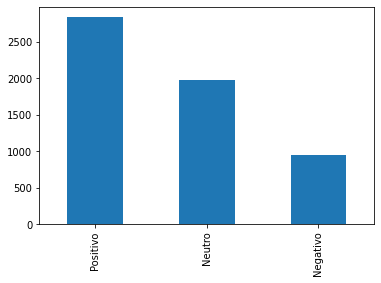

In [ ]:
%matplotlib inline    
import matplotlib.pyplot as plt
print(dfTweet.Classificacao.value_counts())
dfTweet.Classificacao.value_counts().plot(kind='bar')

In [ ]:
# plt.savefig('/content/drive/My Drive/Colab Notebooks/ARQUIVOS/Desbalanceado-A'+str(cont)+'.png') #esta linha cria um arquivo png com o gráfico

# TRANSFORMAÇÃO

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

## Bag of Wors (Saco de palavras)

In [ ]:
vectorizer = CountVectorizer(analyzer="word",
                            #  ngram_range = (1,1)
                            )
Vetor_comentarios = vectorizer.fit_transform(dfTweet["Text"])
words = vectorizer.get_feature_names()
Vetor_comentarios.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
k = 1
print("Vetor PALAVRAS para o comentário: ",k)
print(dfTweet["Text"][k])
print(Vetor_comentarios[k])

Vetor PALAVRAS para o comentário:  1
� govern valad min geral
  (0, 2243)	1
  (0, 5045)	1
  (0, 3183)	1
  (0, 2192)	1


# CLASSIFICAÇÃO

In [ ]:
#Classificadores
from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import LinearSVC
# from sklearn.tree import DecisionTreeClassifier

In [ ]:
modeloNB = MultinomialNB()
modeloNB.fit(Vetor_comentarios,dfTweet["Classificacao"] )

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Testando o Modelo

In [ ]:
baseteste = ['Esse governo está no início, vamos ver o que vai dar',
             'Estou muito feliz com o governo de Minas esse ano',
             'O estado de Minas Gerais decretou calamidade financeira!!!',
             'A segurança desse país está deixando a desejar',
             'O governador de Minas é do PT']

In [ ]:
print(baseteste)

['Esse governo está no início, vamos ver o que vai dar', 'Estou muito feliz com o governo de Minas esse ano', 'O estado de Minas Gerais decretou calamidade financeira!!!', 'A segurança desse país está deixando a desejar', 'O governador de Minas é do PT']


In [ ]:
baseteste = [Normalizacao(i) for i in baseteste]
baseteste = [removestopwords(i) for i in baseteste]
baseteste = [Stemming(i) for i in baseteste]
print(baseteste)

['govern iníci vam ver vai dar', 'feliz govern min ano', 'est min geral decret calam financ', 'seguranç dess país deix desej', 'govern min pt']


In [ ]:
freq_testes = vectorizer.transform(baseteste)

In [ ]:
print(modeloNB.predict(freq_testes))

['Neutro' 'Neutro' 'Negativo' 'Neutro' 'Negativo']


In [ ]:
print(modeloNB.classes_)
print(modeloNB.predict_proba(freq_testes))

['Negativo' 'Neutro' 'Positivo']
[[2.07405006e-01 7.91400672e-01 1.19432165e-03]
 [2.23585118e-02 9.31888848e-01 4.57526400e-02]
 [9.98473617e-01 1.52622915e-03 1.54318329e-07]
 [1.62925292e-02 9.74988694e-01 8.71877655e-03]
 [7.03858691e-01 2.84904776e-01 1.12365326e-02]]


# VALIDAÇÃO

## Validação com dados de teste e treinamento

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, X, y, cv):
    # O gráfico é inicializado com as características principais
    plt.figure(figsize=(10,6))
    plt.title("Curva de Aprendizado (Modelo Classificador)", fontsize = 18)
    plt.xlabel('Pontos do treinamento',fontsize = 14)
    plt.ylabel('Desempenho', fontsize = 14)
    plt.grid(True)
    
    # Calculamos os valores da curva de aprendizado, acrescentando os dados de 10 em 10 %
    sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    cv = ShuffleSplit(n_splits=10, test_size=0.2, train_size=0.8, random_state=0) #dados de teste 20%
    points, score_in, score_out = learning_curve(estimator, X, y, train_sizes=sizes, cv=cv)

    # Tiramos a média e o desvio padrão de cada sequência de testes. 
    # Por padrão é feita validação cruzada em 3 conjuntos de dados.
    mean_in = np.mean(score_in, axis=1)
    std_in = np.std(score_in, axis=1)
    mean_out = np.mean(score_out, axis=1)
    std_out = np.std(score_out, axis=1)
    # O desempenho de treinamento fica em vermelho e o de validação em verde
    plt.plot(points, mean_in, 'o-', color='red', label='Treinamento')
    plt.plot(points, mean_out, 'o-', color='green', label='Teste')
    # Os desvios ficam ao redor das linhas para indicar a variação no aprendizado
    plt.fill_between(points, mean_in - std_in,
                     mean_in + std_in, color='red', alpha=0.1)
    plt.fill_between(points, mean_out - std_out,
                     mean_out + std_out, color='green', alpha=0.1)
    plt.legend()
    return plt

In [ ]:
tweets = dfTweet.Text
classes = dfTweet.Classificacao

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

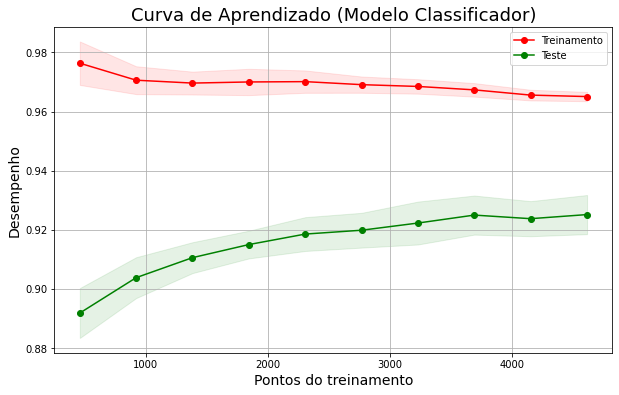

In [ ]:
plot_learning_curve(modeloNB,Vetor_comentarios,classes, cv=None)

## Dividindo dados de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Vetor_comentarios,
                                                    classes,
                                                    stratify=classes,
                                                    test_size=0.20)

In [ ]:
modeloNB.fit(X_train, y_train) # Treinando o classificador
pred = modeloNB.predict(X_test)  # predizendodados de teste

In [ ]:
# imprimir a acurácia do modelo
from sklearn import metrics
print("Acurácia: {:.4f}\n".format(metrics.accuracy_score(y_test, pred)))

Acurácia: 0.9428



In [ ]:
"""##**MÉTRICAS**"""
print(metrics.classification_report(y_test,pred, classesPadrao))

              precision    recall  f1-score   support

    Positivo       0.98      0.97      0.98       568
    Negativo       0.83      0.96      0.89       190
      Neutro       0.96      0.89      0.92       395

    accuracy                           0.94      1153
   macro avg       0.92      0.94      0.93      1153
weighted avg       0.95      0.94      0.94      1153



## Validação cruzada

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

In [ ]:
cross_predito = cross_val_predict(modeloNB,Vetor_comentarios,classes,cv=10)
print("Acurácia: {:.4f}\n".format(metrics.accuracy_score(classes,cross_predito)))

Acurácia: 0.8659



In [ ]:
"""##**MÉTRICAS**"""
print(metrics.classification_report(classes,cross_predito, classesPadrao))

              precision    recall  f1-score   support

    Positivo       0.96      0.88      0.92      2840
    Negativo       0.71      0.92      0.80       951
      Neutro       0.84      0.82      0.83      1974

    accuracy                           0.87      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.88      0.87      0.87      5765



## MÉTRICAS DE DESEMPENHO DO MODELO

## Matriz de Confusão

In [ ]:
!pip install scikit-plot
import scikitplot as skplt
from sklearn.metrics import confusion_matrix

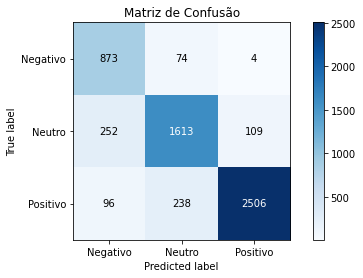

In [ ]:
"""##**MATRIZ DE CONFUSÃO**"""
skplt.metrics.plot_confusion_matrix(y_true=classes,
                                    y_pred = cross_predito,
                                    title="Matriz de Confusão",
                                    figsize=(8,4))